# 2016 Primary Election Results
### A Data Visualization Project
This project takes a look at results from the 2016 primary election. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

##### 1. Import Data

In [3]:
primary_results = pd.read_csv('/users/veronicaventure/Documents/primary_results.csv')
primary_results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [4]:
uscities=pd.read_excel('/users/veronicaventure/Documents/uscities.xlsx')
#uscities.head()

In [5]:
#create df with only 'state_name','county_name','lat','lng'
county_info= uscities[['state_name','county_name','lat','lng']]
county_info.head()

,state_name,county_name,lat,lng
0,Washington,Pierce,46.9994,-122.3921
1,Washington,Kittitas,47.2507,-121.0989
2,Washington,Lincoln,47.3048,-117.9713
3,Washington,Pierce,47.3352,-122.5968
4,Washington,Snohomish,48.0639,-122.0920


##### 2. Merge DataFrames

In [6]:
#rename columns
new_county=county_info.rename(columns={'state_name':'state', 'county_name':'county'})
new_county.head(20)
#drop duplicates
new_county2=new_county.drop_duplicates(['state','county'],keep= 'last')

In [7]:
#merge dataframes on state and county
geo_data=pd.merge(new_county2, primary_results, how='left', on=['state','county'])
geo_data.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Bernie Sanders,255.0,0.770
1,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.230
2,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,Donald Trump,8727.0,0.800
3,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,John Kasich,777.0,0.071
4,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,Ted Cruz,991.0,0.091


##### 3. Create scatter plot of all votes for all candidates in all counties

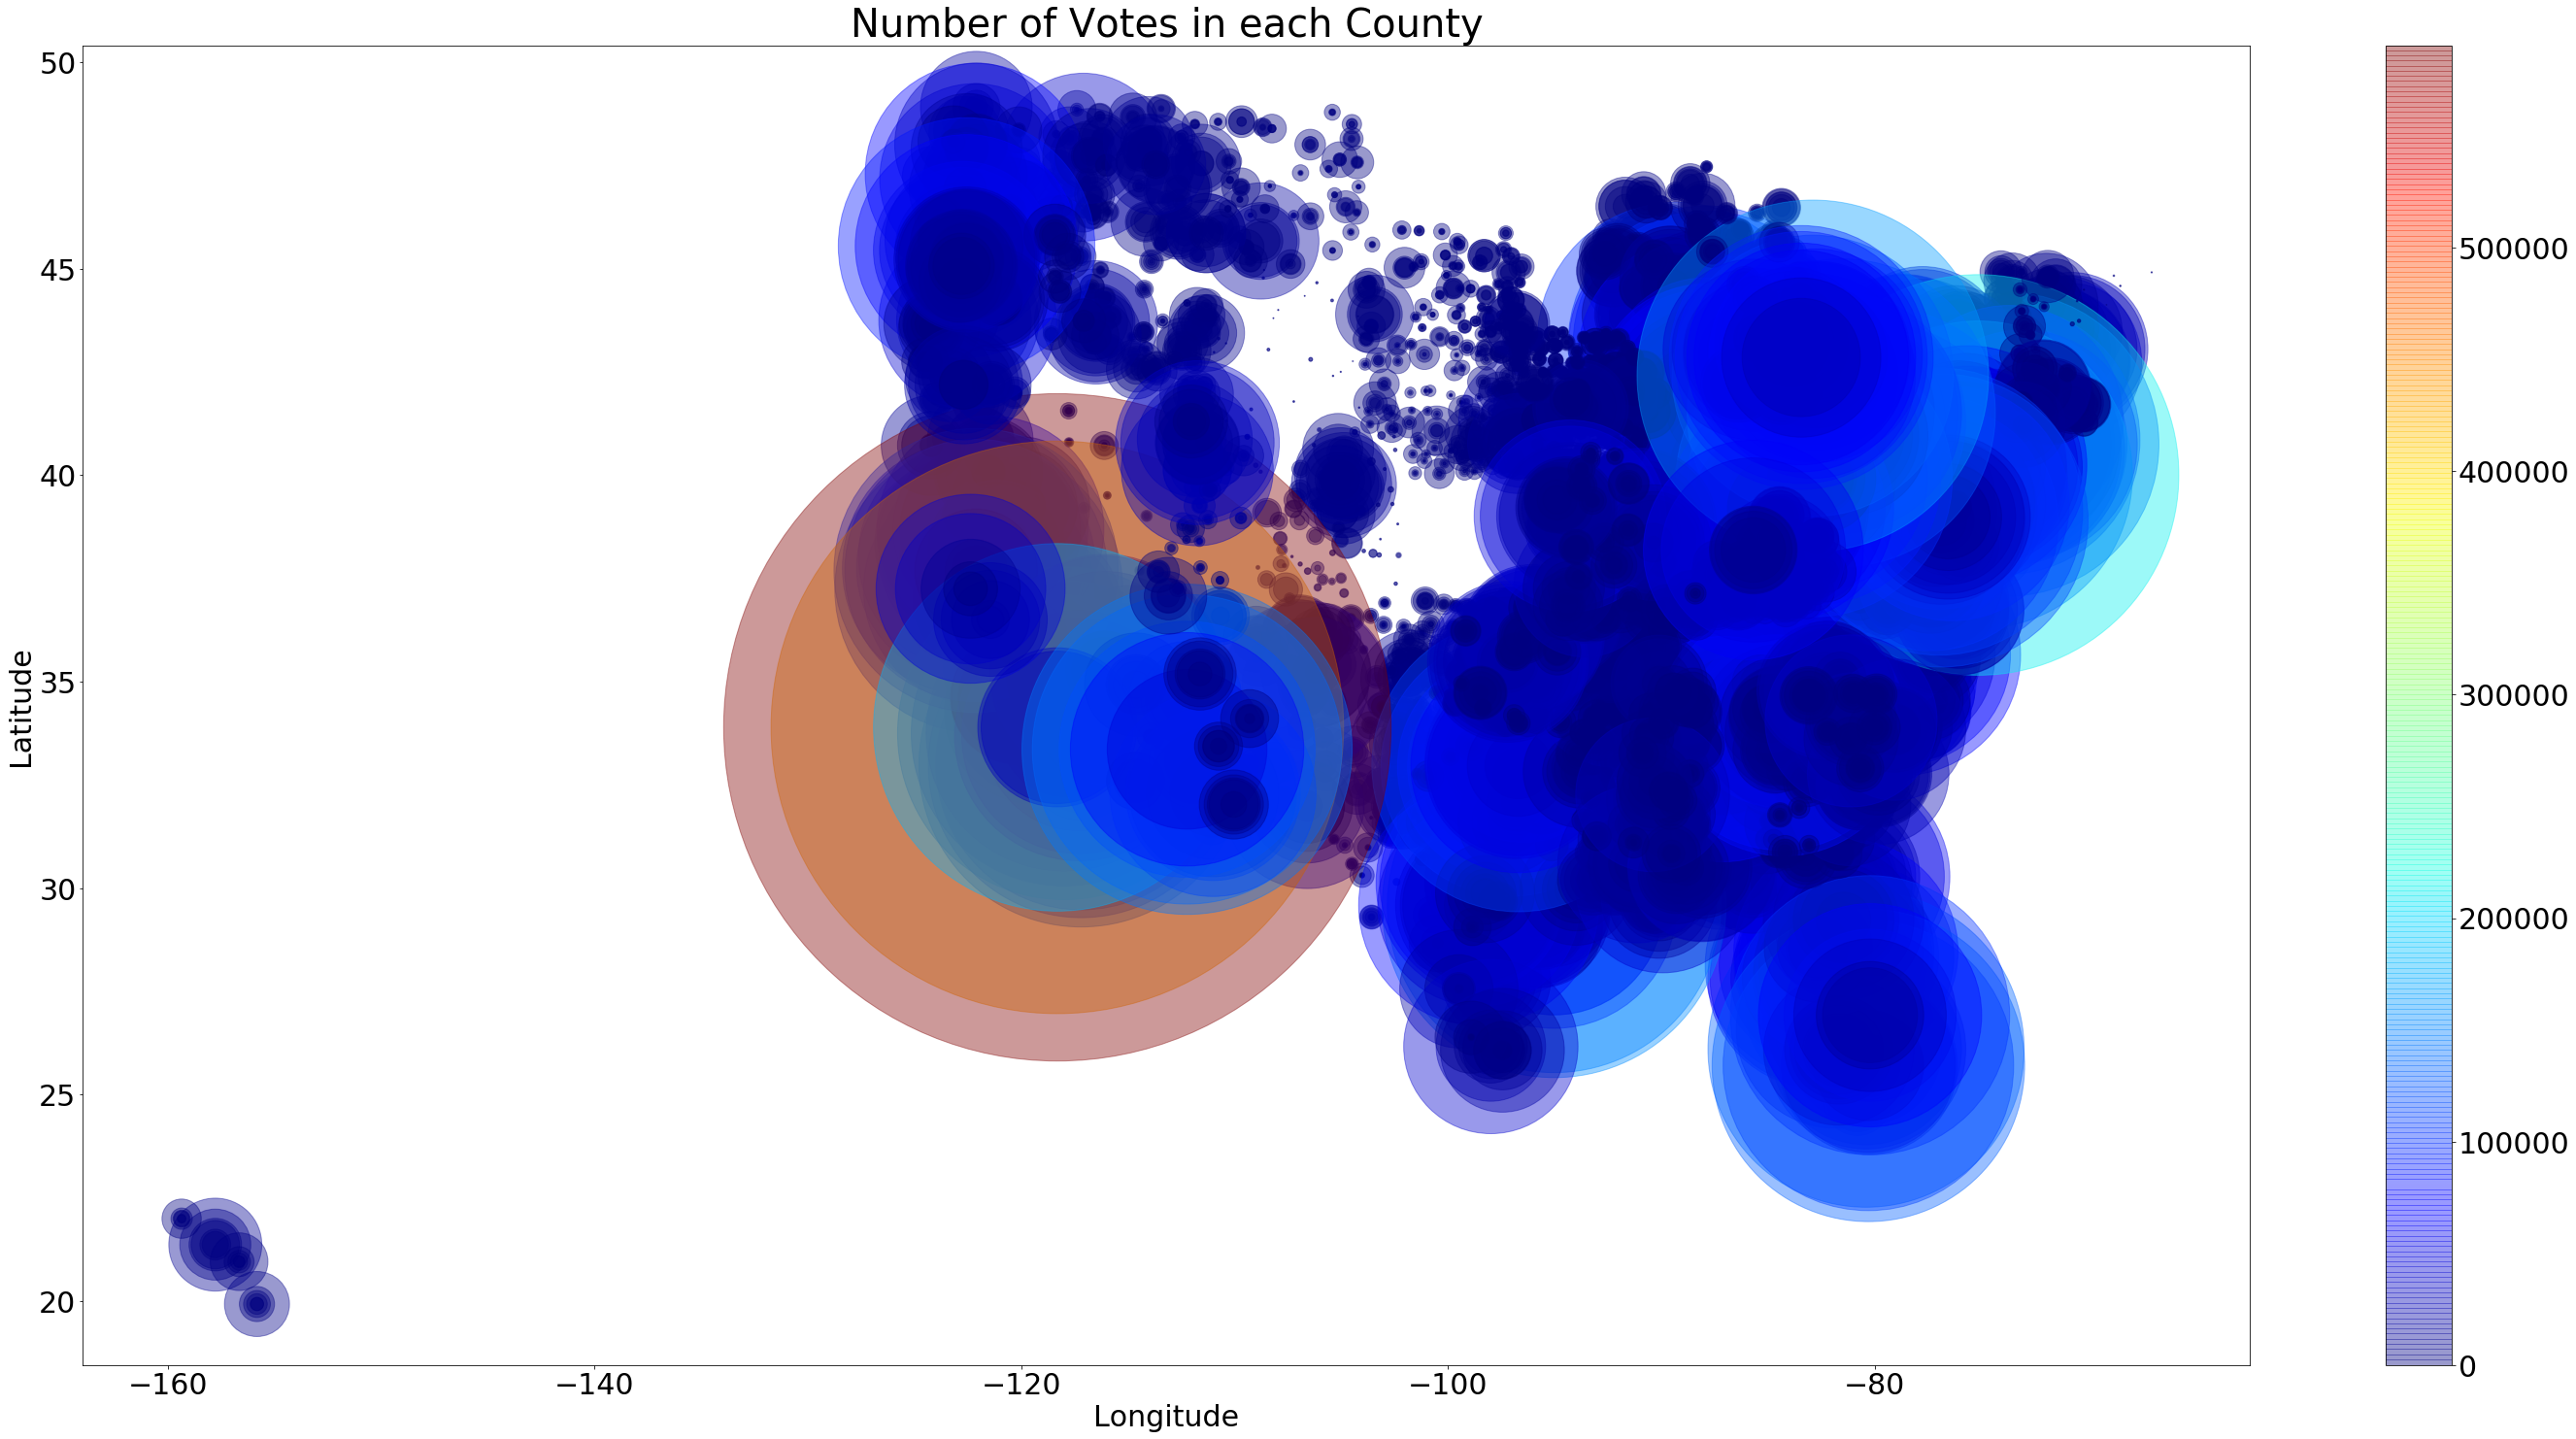

In [8]:
#of votes for all candidates in all counties
fig, ax =plt.subplots(figsize=(50,25))
scat1=plt.scatter(geo_data.lng, geo_data.lat, 
                  c=geo_data.votes, cmap='jet', alpha=0.4,
                  s=geo_data['votes']*.8)
cbar=plt.colorbar(scat1)
cbar.ax.tick_params(labelsize=30)
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)
plt.title('Number of Votes in each County', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()


The size and color of the circles show the number of votes, but the plot does not not distunguish between candidates. It looks like the most votes in a single county were cast somewhere in California. Most counties had between 0 and 100,000 votes cast.

##### 4. Let's look at only the results for Hillary Clinton

In [9]:
#create df with only Hillary data
hillary=primary_results.loc[primary_results['candidate']=='Hillary Clinton']
hillary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [10]:
#merge data to get longitiude and latitude
hillary_geo=pd.merge(new_county2, hillary, how='left', on=['state','county'])
#hillary_geo.head()


In [11]:
hillary_geo=hillary_geo[hillary_geo.votes!=0]

In [12]:
hillary_geo=hillary_geo.round({'fraction_votes':2})
hillary_geo.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.23
1,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Democrat,Hillary Clinton,25.0,0.24
2,Washington,Pend Oreille,48.8540,-117.3899,WA,53051.0,Democrat,Hillary Clinton,10.0,0.22
3,Washington,Garfield,46.4737,-117.5967,WA,53023.0,Democrat,Hillary Clinton,2.0,0.40
4,Washington,Chelan,47.5948,-120.6633,WA,53007.0,Democrat,Hillary Clinton,63.0,0.28


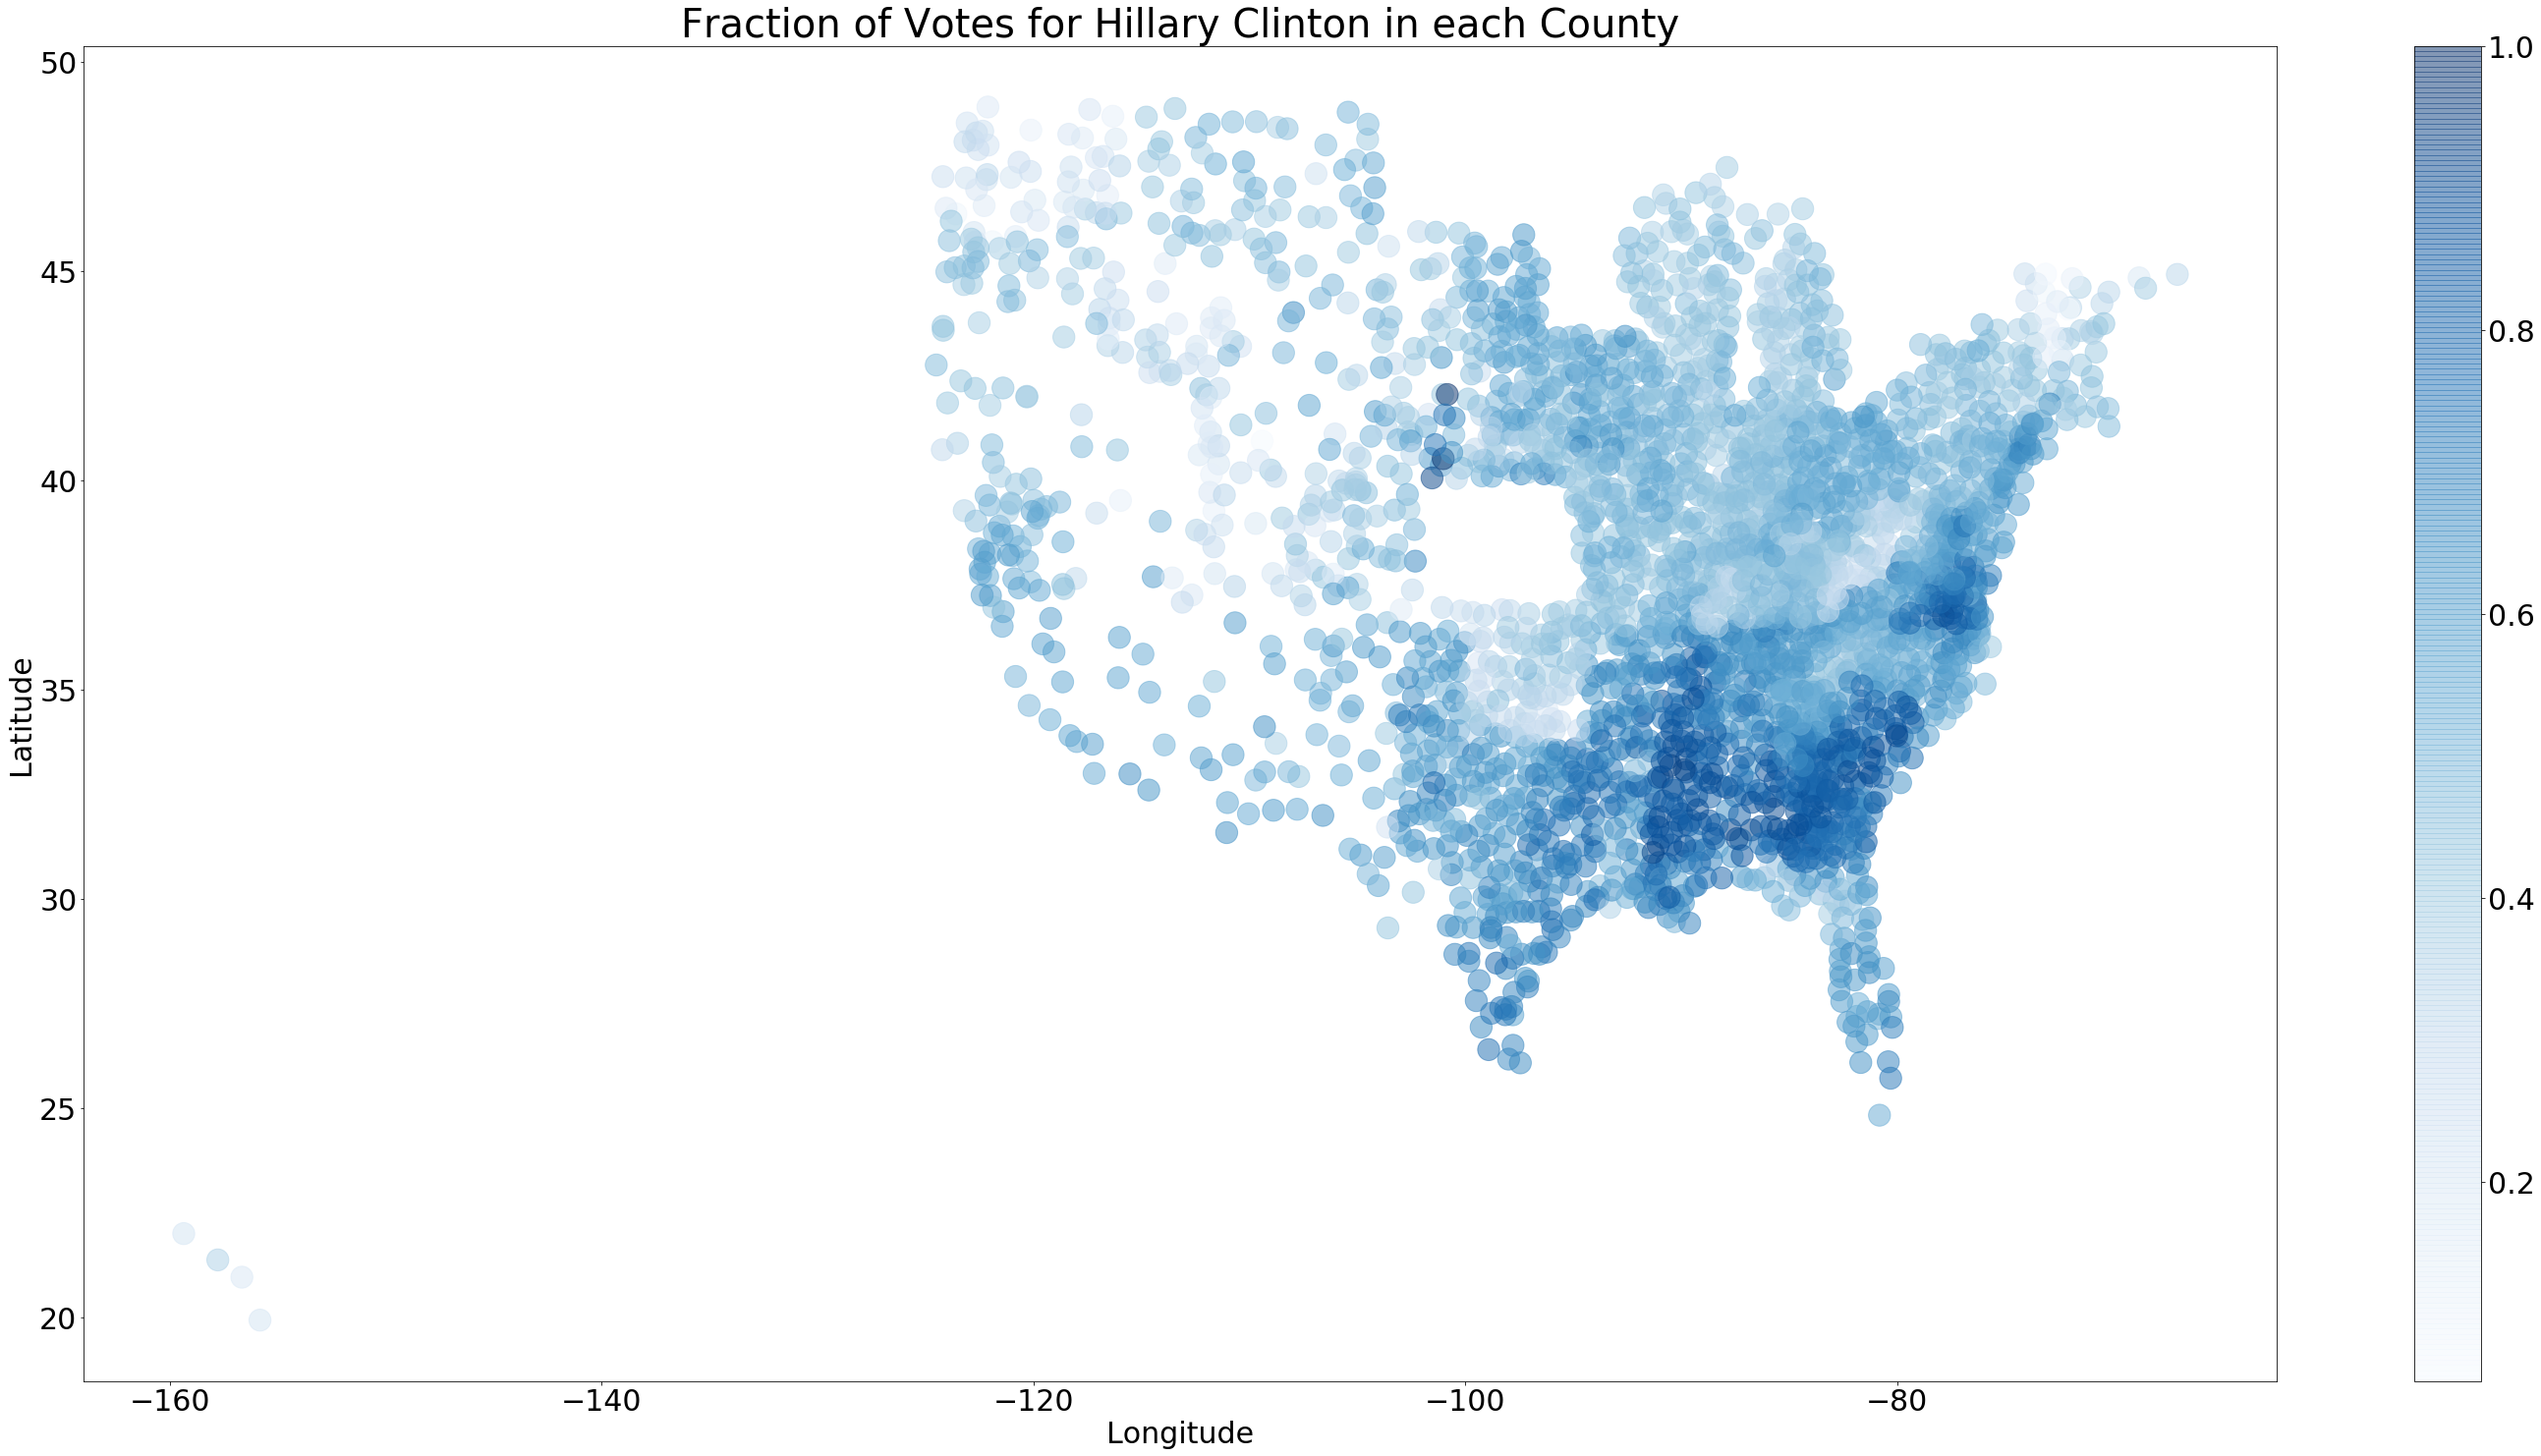

In [13]:
#number of votes in each county
fig, ax= plt.subplots(figsize=(50,25))
scat2= plt.scatter(hillary_geo.lng, hillary_geo.lat, c= hillary_geo['fraction_votes'], cmap='Blues', s=500, alpha=.5)
cbar1=plt.colorbar(scat2)
cbar1.ax.tick_params(labelsize=30)
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)
plt.title('Fraction of Votes for Hillary Clinton in each County', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()


The plot shows the fraction of votes for Hillary Clinton in each county. It looks like most of her support came from the North East and South East.


##### 5. Now let's see who had the most votes in each county

In [14]:
#sort data by state, county and votes
sorted_geo=geo_data.sort_values(by=['state','county','votes'])

In [15]:
#create new DF with one row for each county that has the candidate with the most votes
top_votes=sorted_geo.drop_duplicates(['state','county'],keep= 'last')
top_votes=top_votes.dropna(subset=['candidate'])
top_votes.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
7946,Alabama,Autauga,32.5797,-86.4529,AL,1001.0,Republican,Donald Trump,5387.0,0.445
7932,Alabama,Baldwin,31.0034,-87.6323,AL,1003.0,Republican,Donald Trump,23618.0,0.469
8091,Alabama,Barbour,31.6635,-85.5035,AL,1005.0,Democrat,Hillary Clinton,2567.0,0.906
7799,Alabama,Bibb,32.9421,-87.1753,AL,1007.0,Republican,Donald Trump,1959.0,0.494
8030,Alabama,Blount,33.9965,-86.5671,AL,1009.0,Republican,Donald Trump,7390.0,0.487


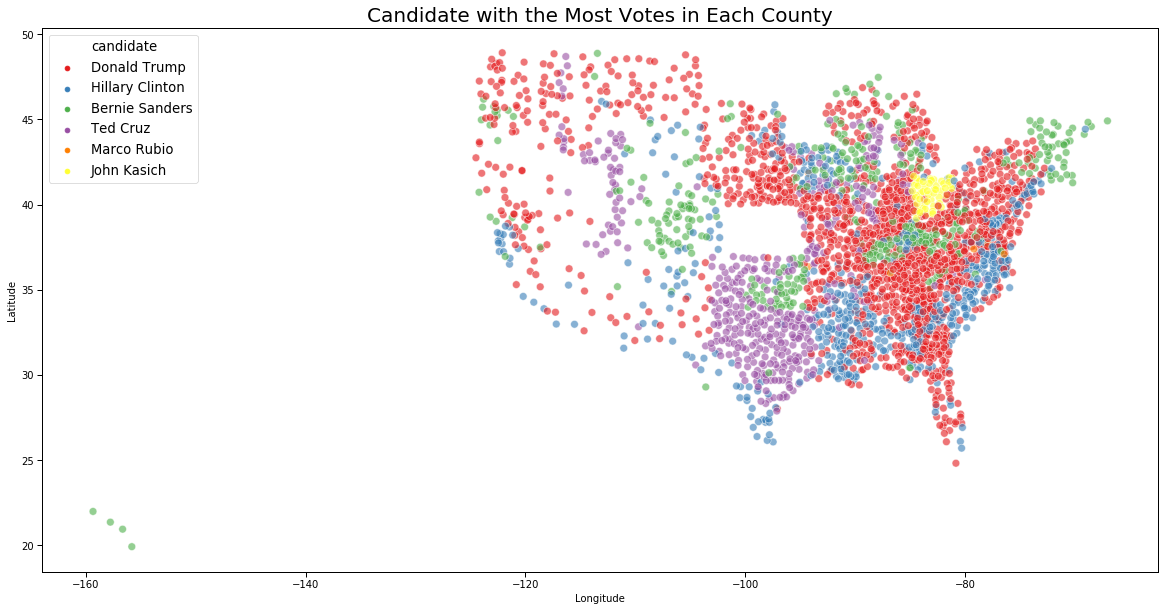

In [45]:
#show top canididate in each county
plt.figure(figsize=(20,10))
sns.set_context('paper', font_scale=1.5)
sns.scatterplot('lng', 'lat', data=top_votes, 
           hue='candidate', 
           palette='Set1', s=60, alpha=.6)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.title('Candidate with the Most Votes in Each County', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### 6. Create a map with only information about votes for Hillary and Bernie

In [18]:
#create new Df with only hillary and bernie
array = ['Hillary Clinton', 'Bernie Sanders']
dem_data=geo_data.loc[geo_data['candidate'].isin(array)]
dem_data.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
0,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Bernie Sanders,255.0,0.770
1,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.230
5,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Democrat,Bernie Sanders,79.0,0.760
6,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Democrat,Hillary Clinton,25.0,0.240
10,Washington,Pend Oreille,48.8540,-117.3899,WA,53051.0,Democrat,Bernie Sanders,35.0,0.778


In [19]:
#sort dem_data by state, county and votes
sorted_dem=dem_data.sort_values(by=['state','county','votes'])

In [20]:
#create new DF with one row for each county that has the candidate with the most votes
top_dem=sorted_dem.drop_duplicates(['state','county'],keep= 'last')
top_dem=top_dem.dropna(subset=['candidate'])
top_dem.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
7944,Alabama,Autauga,32.5797,-86.4529,AL,1001.0,Democrat,Hillary Clinton,2387.0,0.800
7930,Alabama,Baldwin,31.0034,-87.6323,AL,1003.0,Democrat,Hillary Clinton,5290.0,0.647
8091,Alabama,Barbour,31.6635,-85.5035,AL,1005.0,Democrat,Hillary Clinton,2567.0,0.906
7797,Alabama,Bibb,32.9421,-87.1753,AL,1007.0,Democrat,Hillary Clinton,942.0,0.755
8028,Alabama,Blount,33.9965,-86.5671,AL,1009.0,Democrat,Hillary Clinton,564.0,0.551


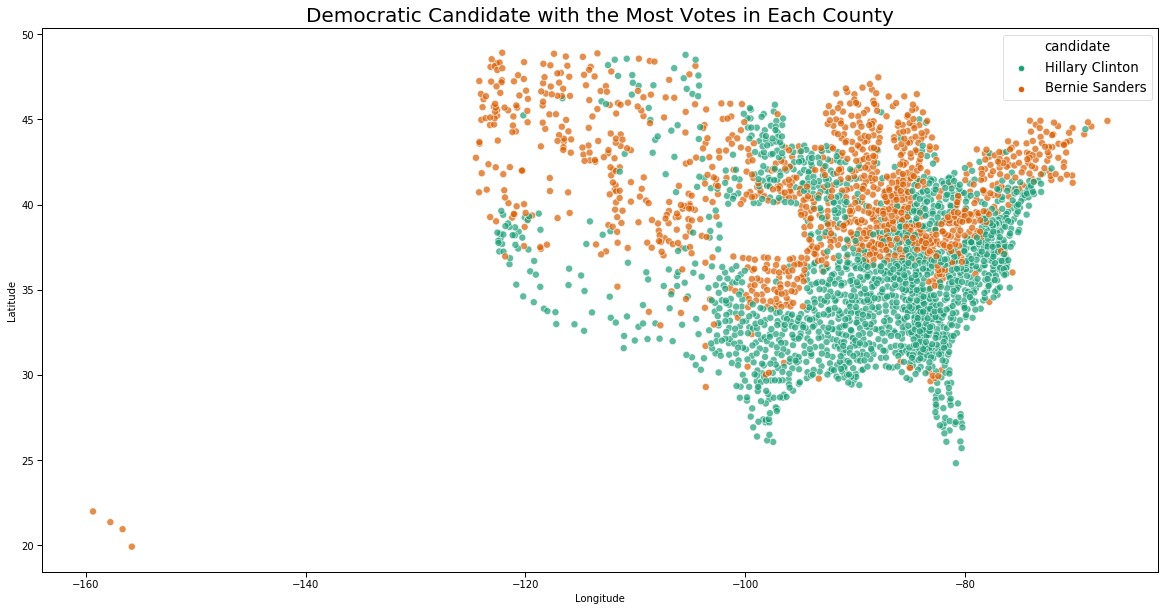

In [29]:
plt.figure(figsize=(20,10))
sns.set_context('paper', font_scale=1.5)
sns.scatterplot('lng', 'lat', data=top_dem, 
           hue='candidate', 
           palette='Dark2', s=50, alpha=.7)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.title('Democratic Candidate with the Most Votes in Each County', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

It looks like Sanders had more support in the North, and Clinton had more support in the South.

##### 7. Compare Clinton and Trump

In [47]:
array2 = ['Hillary Clinton', 'Donald Trump']
clint_trump=geo_data.loc[geo_data['candidate'].isin(array2)]
clint_trump.head()



,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
1,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Democrat,Hillary Clinton,76.0,0.230
2,Washington,Cowlitz,45.9149,-122.7503,WA,53015.0,Republican,Donald Trump,8727.0,0.800
6,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Democrat,Hillary Clinton,25.0,0.240
7,Washington,San Juan,48.5324,-123.0655,WA,53055.0,Republican,Donald Trump,959.0,0.714
11,Washington,Pend Oreille,48.8540,-117.3899,WA,53051.0,Democrat,Hillary Clinton,10.0,0.222


In [48]:
sorted_CT=clint_trump.sort_values(by=['state','county','votes'])

In [49]:
#create new DF with one row for each county that has the candidate with the most votes
top_CT=sorted_CT.drop_duplicates(['state','county'],keep= 'last')
top_CT=top_CT.dropna(subset=['candidate'])
top_CT.head()

,state,county,lat,lng,state_abbreviation,fips,party,candidate,votes,fraction_votes
7946,Alabama,Autauga,32.5797,-86.4529,AL,1001.0,Republican,Donald Trump,5387.0,0.445
7932,Alabama,Baldwin,31.0034,-87.6323,AL,1003.0,Republican,Donald Trump,23618.0,0.469
8091,Alabama,Barbour,31.6635,-85.5035,AL,1005.0,Democrat,Hillary Clinton,2567.0,0.906
7799,Alabama,Bibb,32.9421,-87.1753,AL,1007.0,Republican,Donald Trump,1959.0,0.494
8030,Alabama,Blount,33.9965,-86.5671,AL,1009.0,Republican,Donald Trump,7390.0,0.487


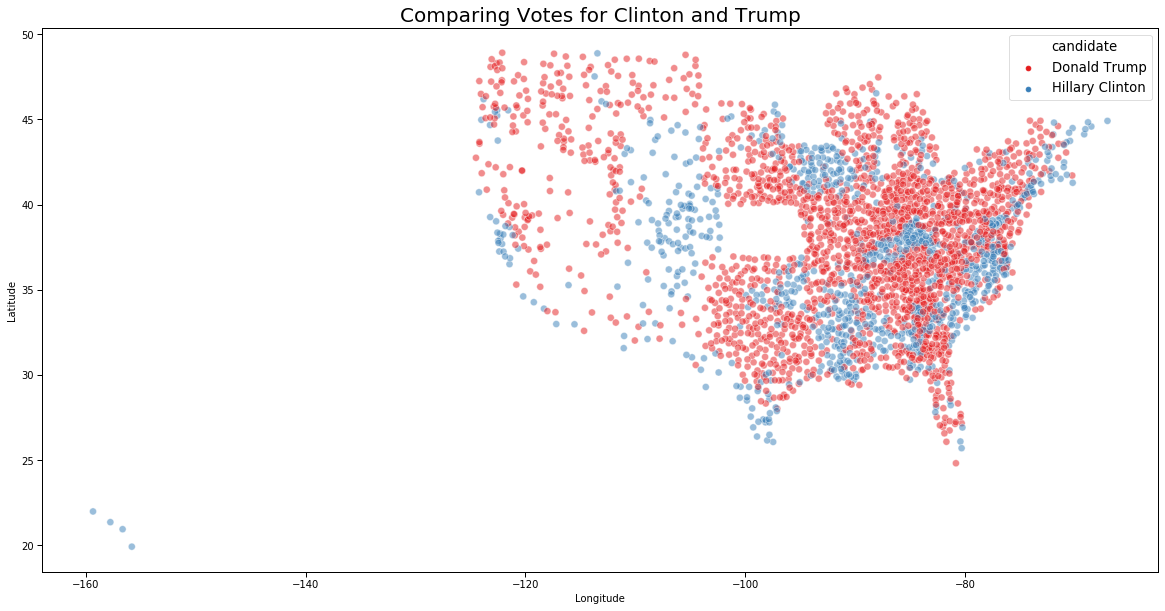

In [52]:
plt.figure(figsize=(20,10))
sns.set_context('paper', font_scale=1.5)
sns.scatterplot('lng', 'lat', data=top_CT, 
           hue='candidate', 
           palette='Set1', s=50, alpha=.5)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.title('Comparing Votes for Clinton and Trump', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The scatter plot shows the counties where Trump had the most votes in red and the counties where Clinton had the most votes in blue.
There seems to be more red than blue in this scatterplot which indicates that there are a greater number of counties with more support for Trump than Hillary. It does not show the number of votes, so while there might be fewer blue dots, they might count for more votes overall. 

##### 8. Create a heatmap of votes for top 6 candidates

In [30]:
#count votes for each candidate in each state and make it a DF
state_data=geo_data.groupby(['state','candidate']).votes.sum().reset_index()
#state_data.head()
array2 = ['Hillary Clinton', 'Bernie Sanders', 'Donald Trump', 'Ted Cruz', 'Marco Rubio', 'John Kasich']
top_candidates=state_data.loc[state_data['candidate'].isin(array2)]
top_candidates.head(10)

,state,candidate,votes
1,Alabama,Bernie Sanders,76399.0
2,Alabama,Donald Trump,371735.0
3,Alabama,Hillary Clinton,309928.0
4,Alabama,John Kasich,37970.0
5,Alabama,Marco Rubio,159802.0
6,Alabama,Ted Cruz,180608.0
7,Arizona,Bernie Sanders,163400.0
8,Arizona,Donald Trump,249916.0
9,Arizona,Hillary Clinton,235697.0
10,Arizona,John Kasich,53040.0


In [23]:
list(top_candidates.columns) 

['state', 'candidate', 'votes']

In [34]:
#create pivot table
top_candidates=pd.pivot_table(top_candidates, index='state', columns=['candidate'], values='votes', fill_value=0)
#Show
top_candidates.head()


candidate,Bernie Sanders,Donald Trump,Hillary Clinton,John Kasich,Marco Rubio,Ted Cruz
state,,,,,,
Alabama,76399,371735,309928,37970,159802,180608
Arizona,163400,249916,235697,53040,0,132147
Arkansas,64514,132546,142668,15079,100999,123379
California,1502043,1174829,1940580,176620,0,144125
Colorado,71928,0,49256,0,0,0


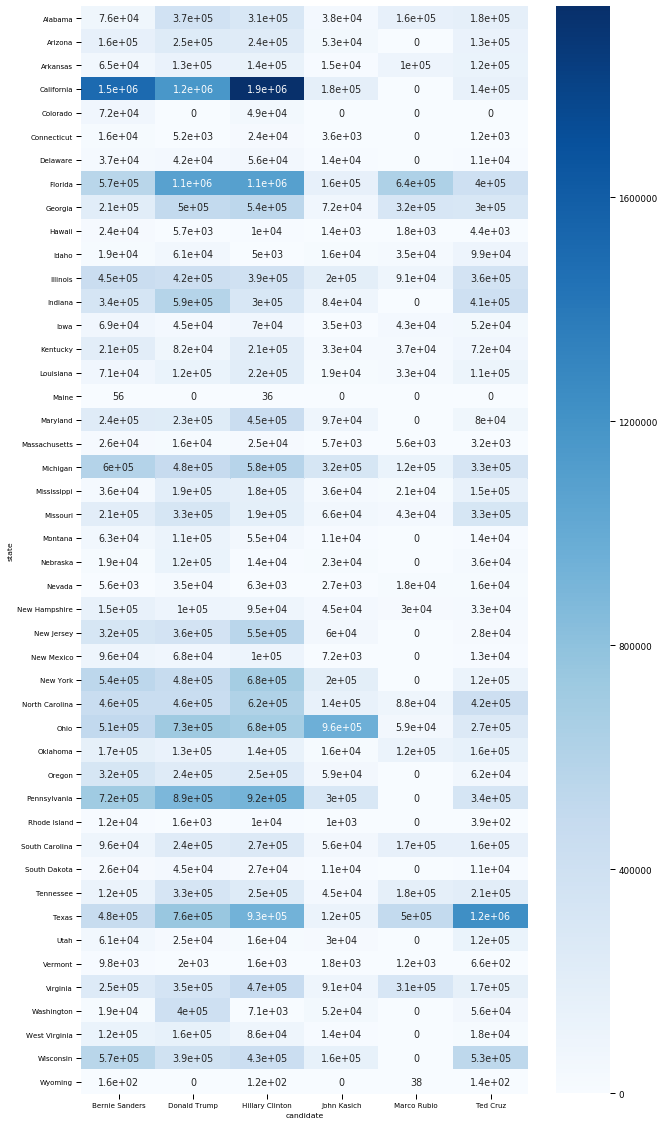

In [42]:
fig, ax = plt.subplots(figsize=(10,20))
sns.set_context('paper', font_scale=1)
sns.heatmap(top_candidates, cmap='Blues', xticklabels=True, yticklabels=True, annot=True)

##### 9. Cluster Candidates and States

<Figure size 720x1440 with 0 Axes>

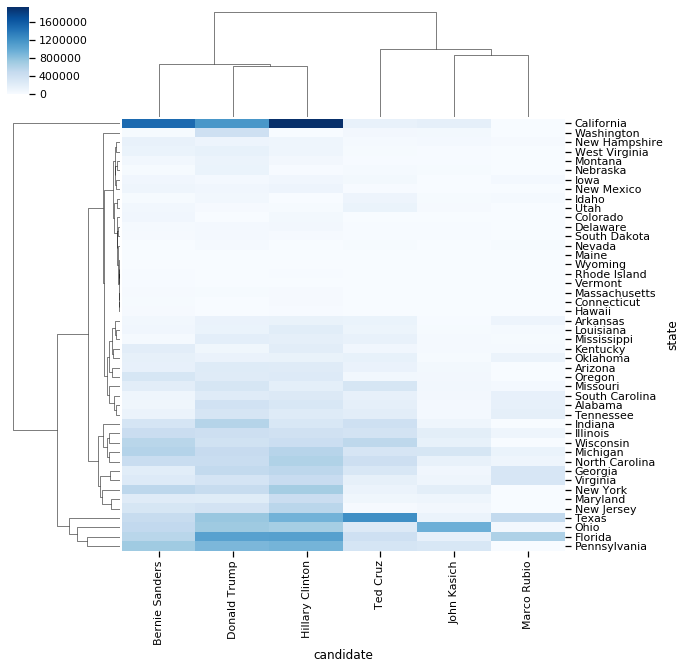

In [26]:
plt.figure(figsize=(10, 20))
sns.set_context('notebook', font_scale=1)
sns.clustermap(top_candidates, cmap='Blues',xticklabels=True, yticklabels=True)

##### 10. Cluster states only

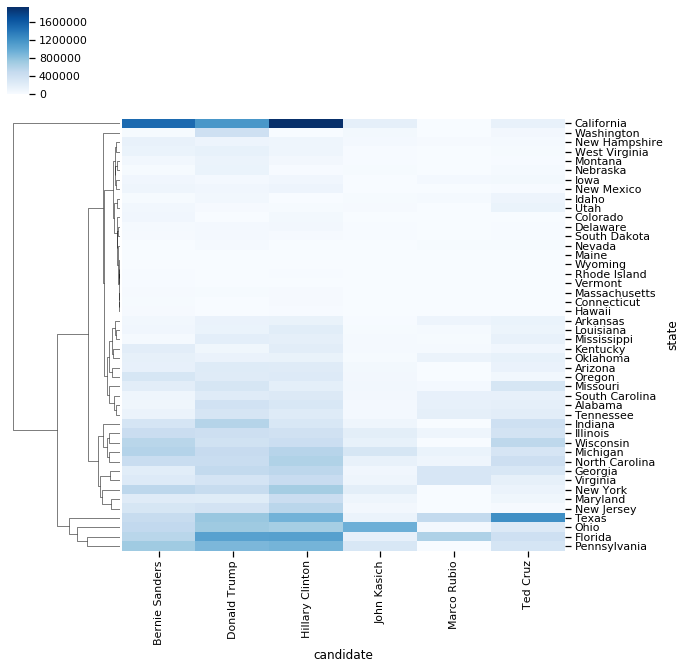

In [27]:
sns.set_context('notebook', font_scale=1)
sns.clustermap(top_candidates,  cmap='Blues', col_cluster=False,xticklabels=True, yticklabels=True )

##### 11. Cluster candidates only

<Figure size 720x1440 with 0 Axes>

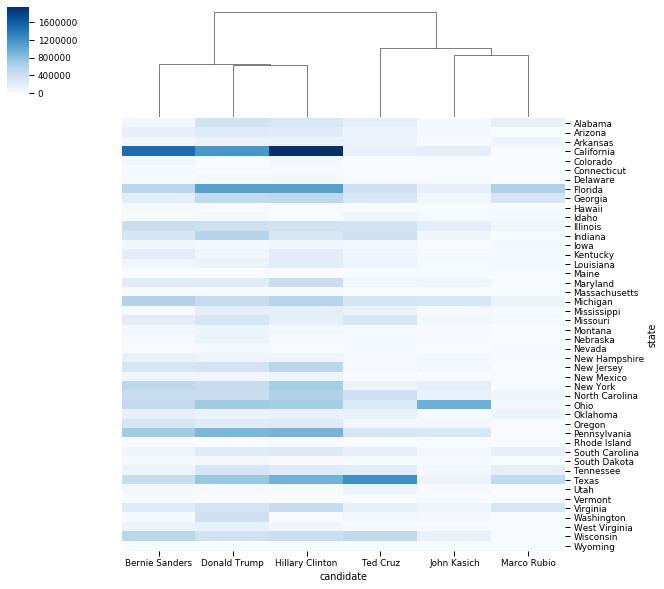

In [28]:
plt.figure(figsize=(10,20))
sns.set_context('paper', font_scale=1)
sns.clustermap(top_candidates, cmap='Blues', row_cluster=False,xticklabels=True, yticklabels=True )

Marco Rubio, Ted Cruz and John Kasich are clustered together which makes sense since they are all republican candidates with a similar number of people voting for them in each state. Rubio had the most votes in Florida which is the state where he is a senator. Cruz had the most votes in Texas which is the state where he is a senator. Kasich had the most votes in Ohio where he was the governor.
Hillary Clinton and Donald Trump are clustered together in a tier slightly lower than Bernie Sanders. This is very interesting since they are in different parties, but also hints at the closeness of the presidential race. Clinton and Trump being clustered together shows that they have a similar number of votes in many states. 
